# Task 1
* India Unepmloyment rate Data Analysis Project

In [2]:
# importing all necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [110]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import cufflinks as cf
import plotly.graph_objs as go
cf.go_offline()
init_notebook_mode(connected=True)

In [8]:
# Import and Reading Dataset

In [11]:
df = pd.read_csv('Unemployment in India.csv')

In [13]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# checking null values

In [15]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [21]:
# checking dataset info and data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [25]:
# Removing null values for better analysis and accurancy

In [23]:
df.dropna(inplace=True)
df.shape

(740, 7)

In [27]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [29]:
# transforming and remaning columns for batter use

In [31]:
df = df.rename(columns={' Date': 'Date', ' frequency':'Frequency',' Estimated Unemployment Rate (%)': 'Est_Unemp_Rate',
                     ' Estimated Employed':'Est_Emp_Rate',' Estimated labour participation (%)':'Est_labour_Rate' }).reset_index(drop=True)

In [33]:
# casting datatypes of date

In [35]:
df['Date']=df['Date'] = pd.to_datetime(df['Date'])

C:\Users\makhu\AppData\Local\Temp\ipykernel_96972\2471232379.py:1: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1   Date                                      740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3   Est_Unemp_Rate                            740 non-null    float64       
 4   Est_Emp_Rate                              740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 40.6+ KB


In [39]:
df.duplicated().sum()

0

In [41]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Region,Date,Frequency,Est_Unemp_Rate,Est_Emp_Rate,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9


In [43]:
# analysis columns 

In [45]:
df['Year'].value_counts()

Year
2019    430
2020    310
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

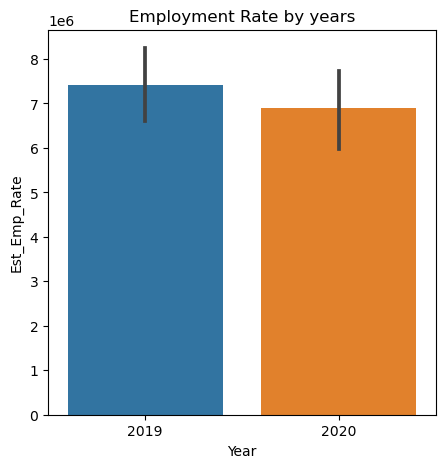

In [49]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Est_Emp_Rate'], x=df['Year'])
plt.title('Employment Rate by years')
plt.show

In [51]:
# employment rate was batter in 2019,therfore by 2020 the were decrease in balour rate

In [53]:
# cheching how many region it's here in dataset

df['Region'].nunique()

28

In [55]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

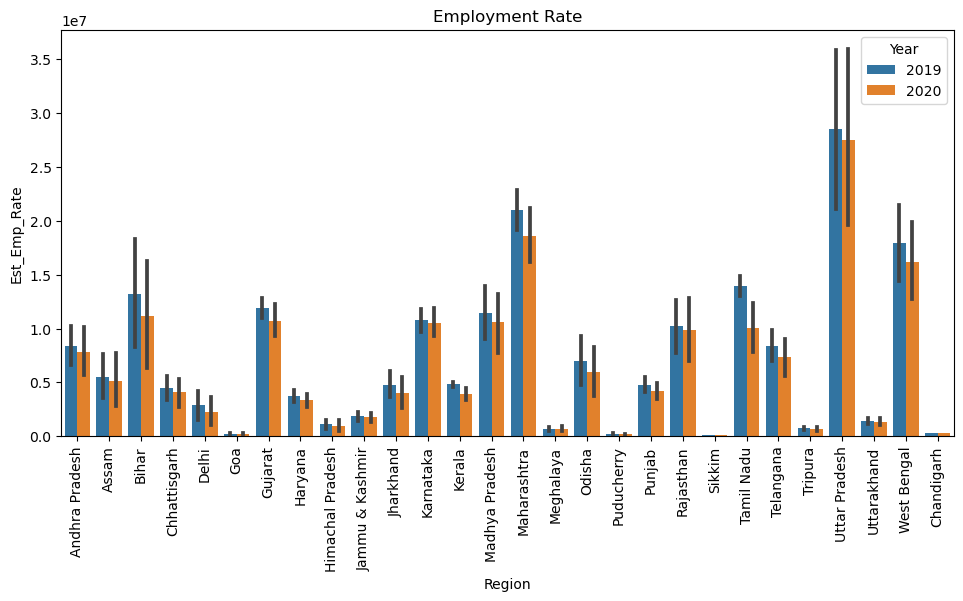

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(y=df['Est_Emp_Rate'], x=df['Region'],hue=df['Year'])
plt.title('Employment Rate')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

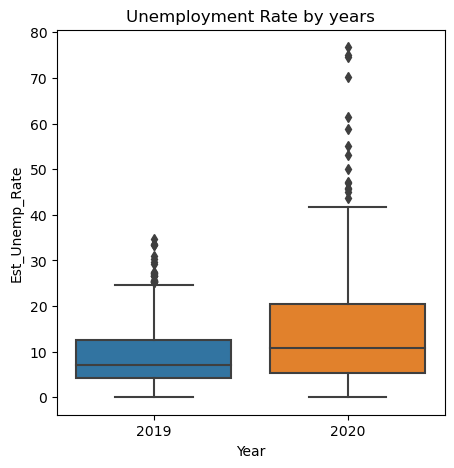

In [81]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df['Est_Unemp_Rate'], x=df['Year'])
plt.title('Unemployment Rate by years')
plt.show

In [79]:
# Increase of unemployment rate in a year 2020

<function matplotlib.pyplot.show(close=None, block=None)>

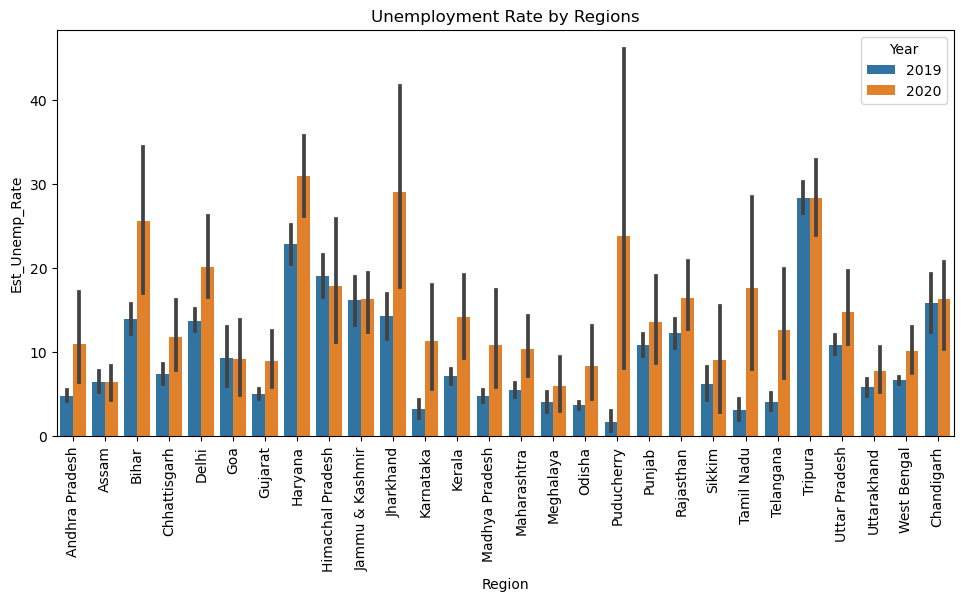

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(y=df['Est_Unemp_Rate'], x=df['Region'],hue=df['Year'])
plt.title('Unemployment Rate by Regions')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show

In [87]:
# Increase of unemployment rate in multiple region

In [89]:
df['Area'].value_counts().head()

Area
Urban    381
Rural    359
Name: count, dtype: int64

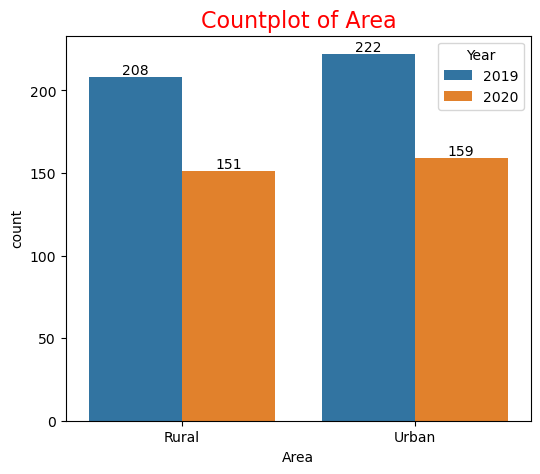

In [97]:
plt.figure(figsize = [6,5])
ax = sns.countplot(data = df, x='Area',hue='Year')
plt.title('Countplot of Area',  fontdict={'fontsize': 16, 'fontweight': 12, 'color':'red'})
for x in ax.containers:
    ax.bar_label(x, rotation=0)

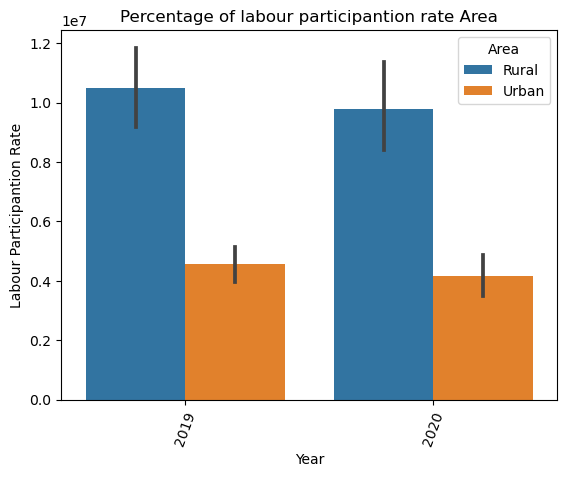

In [100]:
sns.barplot(data=df, x='Year',y='Est_Emp_Rate', hue='Area')
plt.title('Percentage of labour participantion rate Area')
plt.ylabel('Labour Participantion Rate')
plt.xticks(rotation=70)
plt.show()

In [126]:
data = dict(type = 'choropleth',
            locations = df['Region'],
            locationmode = 'India',
            colorscale= 'Portland',
            text= df['Area'],
            z=[1.0,2.0,3.0],
            colorbar = {'title':'India Unemployment rate Analysis'})

In [128]:
layout = dict(geo = {'scope':'india'})